### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
(Xtrain,Ytrain),(Xtest,Ytest) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#### Change train and test labels into one-hot vectors

In [3]:
Xtrain.shape

(60000, 28, 28)

In [4]:
Xtest.shape

(10000, 28, 28)

In [0]:
Ytrain = tf.keras.utils.to_categorical(Ytrain,num_classes=10)

Ytest = tf.keras.utils.to_categorical(Ytest,num_classes=10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
Xtrain = Xtrain / 255

In [0]:
Ytrain = Ytrain / 255

In [0]:
Xtrain = Xtrain.reshape(Xtrain.shape[0] , 28 ,28 ,1)

In [0]:
Xtest = Xtest.reshape(Xtest.shape[0],28,28,1)

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [10]:
import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential

Using TensorFlow backend.


In [11]:
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(64, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer   
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout Layer
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
    
# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))
    
# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(Xtrain, Ytrain, batch_size=64, nb_epoch=10, 
              validation_data=(Xtest, Ytest), callbacks=callback_list)
    


W0614 04:57:26.782218 140649342306176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0614 04:57:26.787107 140649342306176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 04:57:26.796164 140649342306176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarni

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0015 - acc: 0.8596 - val_loss: 1.7952 - val_acc: 0.8860
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 9.5830e-04 - acc: 0.9097 - val_loss: 1.7616 - val_acc: 0.8877
Epoch 3/10
60000/60000 [==============================] - 8s 128us/step - loss: 7.6775e-04 - acc: 0.9270 - val_loss: 1.9914 - val_acc: 0.8733
Epoch 4/10
60000/60000 [==============================] - 8s 129us/step - loss: 6.3240e-04 - acc: 0.9398 - val_loss: 2.4412 - val_acc: 0.8454
Epoch 5/10
60000/60000 [==============================] - 8s 129us/step - loss: 5.1974e-04 - acc: 0.9506 - val_loss: 1.6444 - val_acc: 0.8960
Epoch 6/10
60000/60000 [==============================] - 8s 128us/step - loss: 4.2032e-04 - acc: 0.9597 - val_loss: 1.8743 - val_acc: 0.8816
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - loss: 3.3376e-04 - acc: 0.9

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [12]:
model.evaluate(Xtest,Ytest)

10000/10000 [==============================] - 1s 54us/step


[2.0905197160720825, 0.8689]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [17]:
(Xtrain,Ytrain),(Xtest,Ytest) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [19]:
Xtrain.shape

(50000, 32, 32, 3)

In [21]:
Xtest.shape

(10000, 32, 32, 3)

In [0]:
Ytrain = tf.keras.utils.to_categorical(Ytrain,num_classes=10)

Ytest =  tf.keras.utils.to_categorical(Ytest,num_classes=10)


In [0]:
Xtrain = Xtrain / 255

Xtest = Xtest / 255

In [0]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], 32, 32, 3)
Xtest = Xtest.reshape(Xtest.shape[0], 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(Xtrain)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

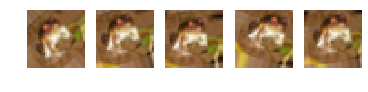

In [33]:
from matplotlib import pyplot as plt
gen = datagen.flow(Xtrain[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()